# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-colorblind')
import pickle
import sys
sys.path.append("..")
import DispaSET as ds

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-colorblind')
%matplotlib notebook

In [3]:
from DispaSET.postprocessing import postprocessing as post
reload(post)

<module 'DispaSET.postprocessing.postprocessing' from '../DispaSET/postprocessing/postprocessing.pyc'>

In [4]:
pd.options.display.max_rows = 60   #default 60 (None)
pd.options.display.max_columns = 60   #default 60 (None)
np.set_printoptions(threshold=1000)   #default 1000 (np.inf)

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [312]:
path1 = '../Simulations/simulation_GCC_int2'    #With Trade
path2 = '../Simulations/simulation_GCC_int_isolated2'    #Without Trade

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [313]:
#This function reads the simulation environment folder once it has been solved and loads
# the input variables together with the results.
inputs1,results1 = ds.get_sim_results(path=path1,cache=True)
inputs2,results2 = ds.get_sim_results(path=path2,cache=True)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS24.7/sysdir as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file ../Simulations/simulation_GCC_int2/Results.gdx took 8.89383506775s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 10.0172889233s
[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS24.7/sysdir as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file ../Simulations/simulation_GCC_int_isolated2/Results.gdx took 7.16693711281s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 9.58870387077s


### Format the inputs as a dictionary of dataframes:

In [314]:
#Function that converts the dispaset data format into a dictionary of dataframes
datain1 = ds.ds_to_df(inputs1)
datain2 = ds.ds_to_df(inputs2)

### Select the time period for plotting

In [315]:
rng = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-12-29 23:00:00',freq='h')
rng1 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-01-31 23:00:00',freq='h')
rng2 = pd.DatetimeIndex(start='2016-02-01 00:00:00',end='2016-02-29 23:00:00',freq='h')
rng3 = pd.DatetimeIndex(start='2016-03-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rng4 = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-04-30 23:00:00',freq='h')
rng5 = pd.DatetimeIndex(start='2016-05-01 00:00:00',end='2016-05-31 23:00:00',freq='h')
rng6 = pd.DatetimeIndex(start='2016-06-01 00:00:00',end='2016-06-30 23:00:00',freq='h')
rng7 = pd.DatetimeIndex(start='2016-07-01 00:00:00',end='2016-07-31 23:00:00',freq='h')
rng8 = pd.DatetimeIndex(start='2016-08-01 00:00:00',end='2016-08-31 23:00:00',freq='h')
rng9 = pd.DatetimeIndex(start='2016-09-01 00:00:00',end='2016-09-30 23:00:00',freq='h')
rng10 = pd.DatetimeIndex(start='2016-10-01 00:00:00',end='2016-10-31 23:00:00',freq='h')
rng11 = pd.DatetimeIndex(start='2016-11-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rng12 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')

### -- General functions

In [316]:
#Reads the DispaSET results and provides useful general information to stdout
r1 = ds.get_result_analysis(inputs1,results1)


Average electricity cost : BA            0.580455
KW            6.759049
OM            2.878576
QA            4.684409
SA_EOA       15.925096
SA_HAIL       0.807319
SA_NEOA       0.690114
SA_NWOA       2.285828
SA_QASSIM     0.119920
SA_RIYADH     9.745630
SA_SOA        3.856046
SA_WOA       20.732603
UAE          11.017485
dtype: float64 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:669.940684245 TWh
Peak load:116859.934 MW
Net importations:0.0 TWh

Country-Specific values (in TWh or in MW):
               Demand   PeakLoad  NetImports  LoadShedding  Curtailment
SA_EOA     127.079527  19870.000   -8.224849           NaN          NaN
SA_RIYADH   81.918741  16102.450   -4.896819           NaN          NaN
SA_QASSIM   15.467767   3012.087   15.108179           NaN          NaN
SA_HAIL      5.936319   1190.738    3.346084           NaN          NaN
SA_WOA      99.005586  18075.000   -9.949802           NaN          NaN
SA_SOA      36.428948   5855.000   14.424

In [317]:
#Reads the DispaSET results and provides useful general information to stdout
r2 = ds.get_result_analysis(inputs2,results2)


Average electricity cost : BA            1.508171
KW            5.675442
OM            2.587877
QA            3.552320
SA_EOA       17.212327
SA_HAIL       0.821324
SA_NEOA       0.690433
SA_NWOA       2.287948
SA_QASSIM     0.122654
SA_RIYADH    10.698484
SA_SOA        3.868176
SA_WOA       20.740387
UAE          11.362888
dtype: float64 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:669.940684245 TWh
Peak load:116859.934 MW
Net importations:0.0 TWh

Country-Specific values (in TWh or in MW):
               Demand   PeakLoad  NetImports  LoadShedding  Curtailment
SA_EOA     127.079527  19870.000  -17.076078           NaN          NaN
SA_RIYADH   81.918741  16102.450  -11.676985           NaN          NaN
SA_QASSIM   15.467767   3012.087   15.099721           NaN          NaN
SA_HAIL      5.936319   1190.738    3.301148           NaN          NaN
SA_WOA      99.005586  18075.000  -10.035642           NaN          NaN
SA_SOA      36.428948   5855.000   14.383

In [318]:
#Total output system cost in Millions $ (converted from euros €)
(results1['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)

BA             430.244193
KW            5009.933528
OM            2133.654442
QA            3472.171459
SA_EOA       11803.978802
SA_HAIL        598.399835
SA_NEOA        511.525030
SA_NWOA       1694.298505
SA_QASSIM       88.887309
SA_RIYADH     7223.643155
SA_SOA        2858.173176
SA_WOA       15367.392650
UAE           8166.365894
dtype: float64

In [319]:
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost1 = (results1['OutputSystemCost'].sum()['SA_EOA']+results1['OutputSystemCost'].sum()['SA_HAIL']+results1['OutputSystemCost'].sum()['SA_NEOA']+results1['OutputSystemCost'].sum()['SA_NWOA']+results1['OutputSystemCost'].sum()['SA_QASSIM']+results1['OutputSystemCost'].sum()['SA_RIYADH']+results1['OutputSystemCost'].sum()['SA_SOA']+results1['OutputSystemCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost1/(1000000)

40146.298462342791

In [320]:
A = pd.Series(((results1['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost1 = pd.DataFrame((results1['OutputSystemCost'].sum()*(1/0.90383675))/(1000000))
SystemCost1 = SystemCost1.append(A, ignore_index=False)
SystemCost1.columns = ['SystemCost']
SystemCost1

,SystemCost
BA,430.244193
KW,5009.933528
OM,2133.654442
QA,3472.171459
SA_EOA,11803.978802
SA_HAIL,598.399835
SA_NEOA,511.525030
SA_NWOA,1694.298505
SA_QASSIM,88.887309
SA_RIYADH,7223.643155


<IPython.core.display.Javascript object>


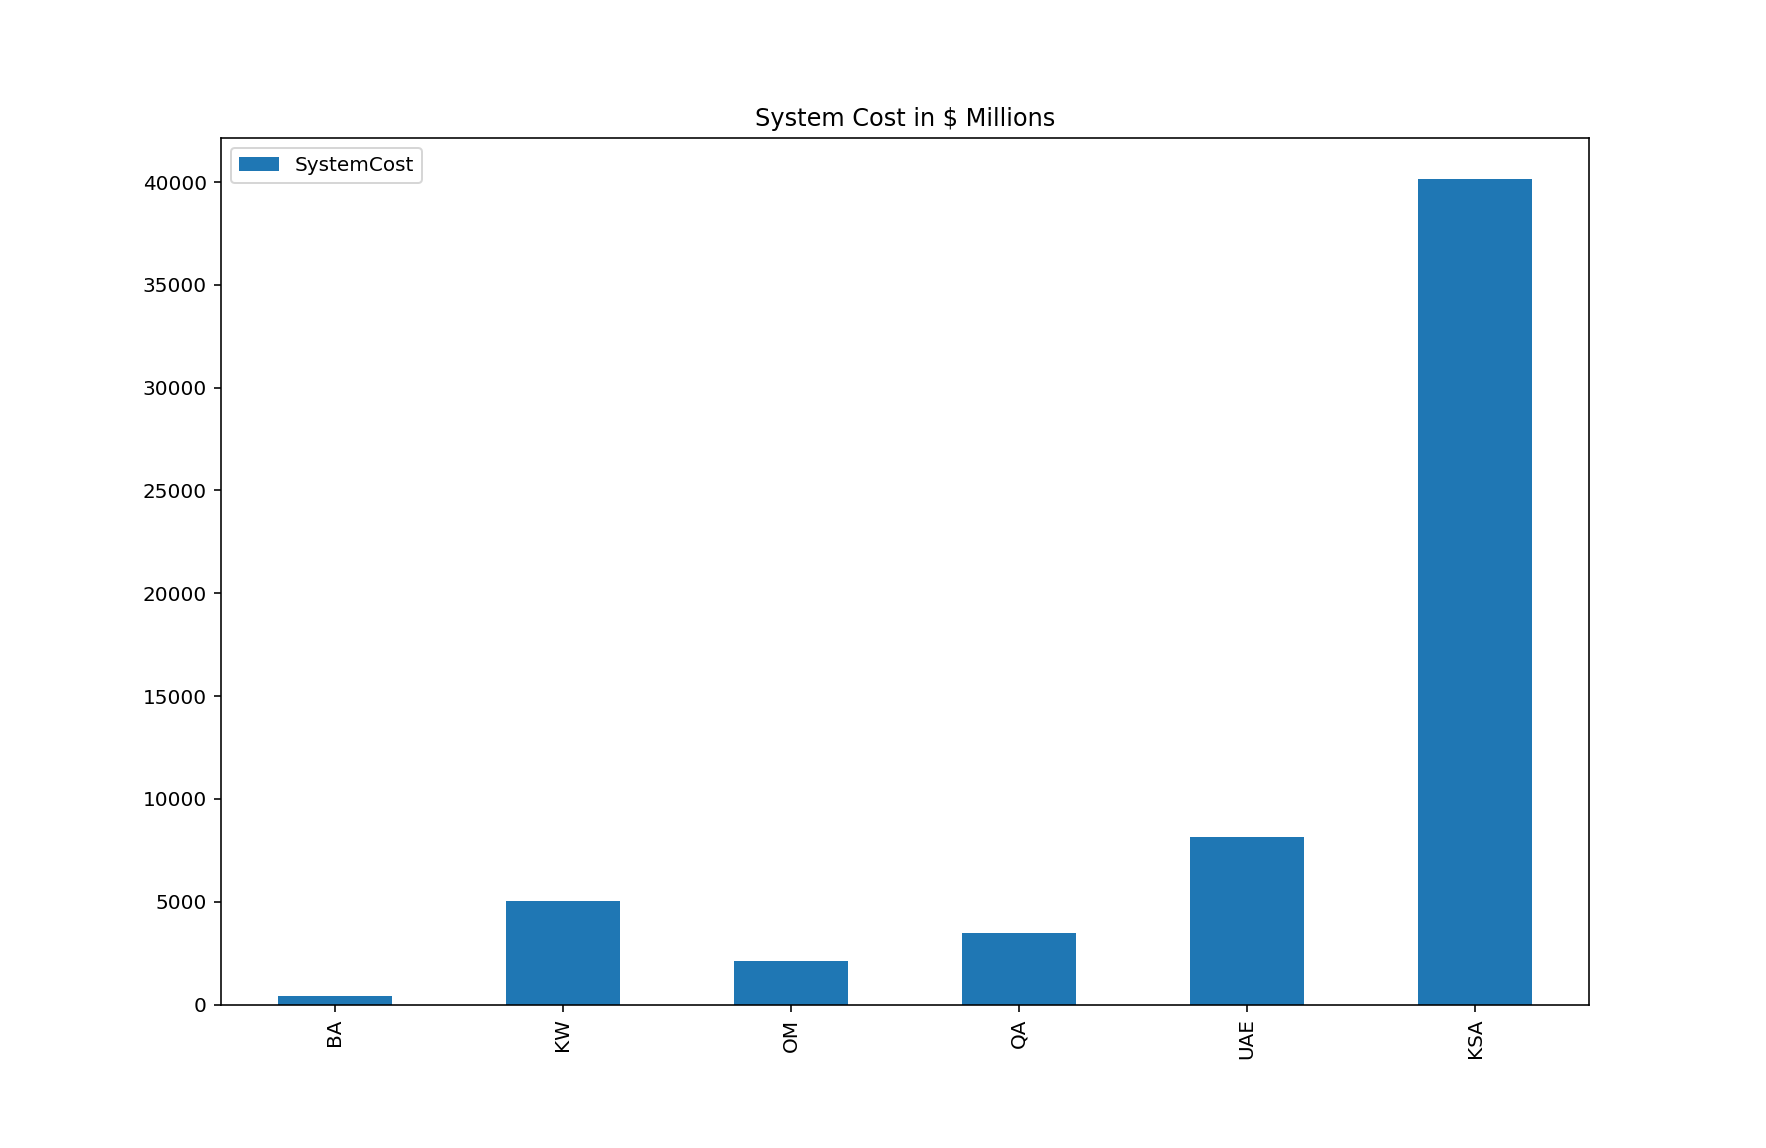

In [321]:
SystemCost1.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')


In [110]:
#Total output system cost in Millions $ (converted from euros €)
(results2['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)

BA           309.216474
KW           530.913326
OM           566.241754
QA           217.975470
SA_EOA       645.190363
SA_HAIL       24.404965
SA_NEOA      112.185159
SA_NWOA      225.182968
SA_QASSIM      2.596429
SA_RIYADH    835.009866
SA_SOA       247.507042
SA_WOA       611.711350
UAE          699.062159
dtype: float64

In [322]:
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost2 = (results2['OutputSystemCost'].sum()['SA_EOA']+results2['OutputSystemCost'].sum()['SA_HAIL']+results2['OutputSystemCost'].sum()['SA_NEOA']+results2['OutputSystemCost'].sum()['SA_NWOA']+results2['OutputSystemCost'].sum()['SA_QASSIM']+results2['OutputSystemCost'].sum()['SA_RIYADH']+results2['OutputSystemCost'].sum()['SA_SOA']+results2['OutputSystemCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost2/(1000000)

41835.667815448629

In [323]:
A = pd.Series(((results2['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost2 = pd.DataFrame((results2['OutputSystemCost'].sum()*(1/0.90383675))/(1000000))
SystemCost2 = SystemCost2.append(A, ignore_index=False)
SystemCost2.columns = ['SystemCost']
SystemCost2

,SystemCost
BA,1117.884293
KW,4206.743712
OM,1918.182826
QA,2633.046151
SA_EOA,12758.098693
SA_HAIL,608.780940
SA_NEOA,511.761896
SA_NWOA,1695.869463
SA_QASSIM,90.913782
SA_RIYADH,7929.915867


<IPython.core.display.Javascript object>


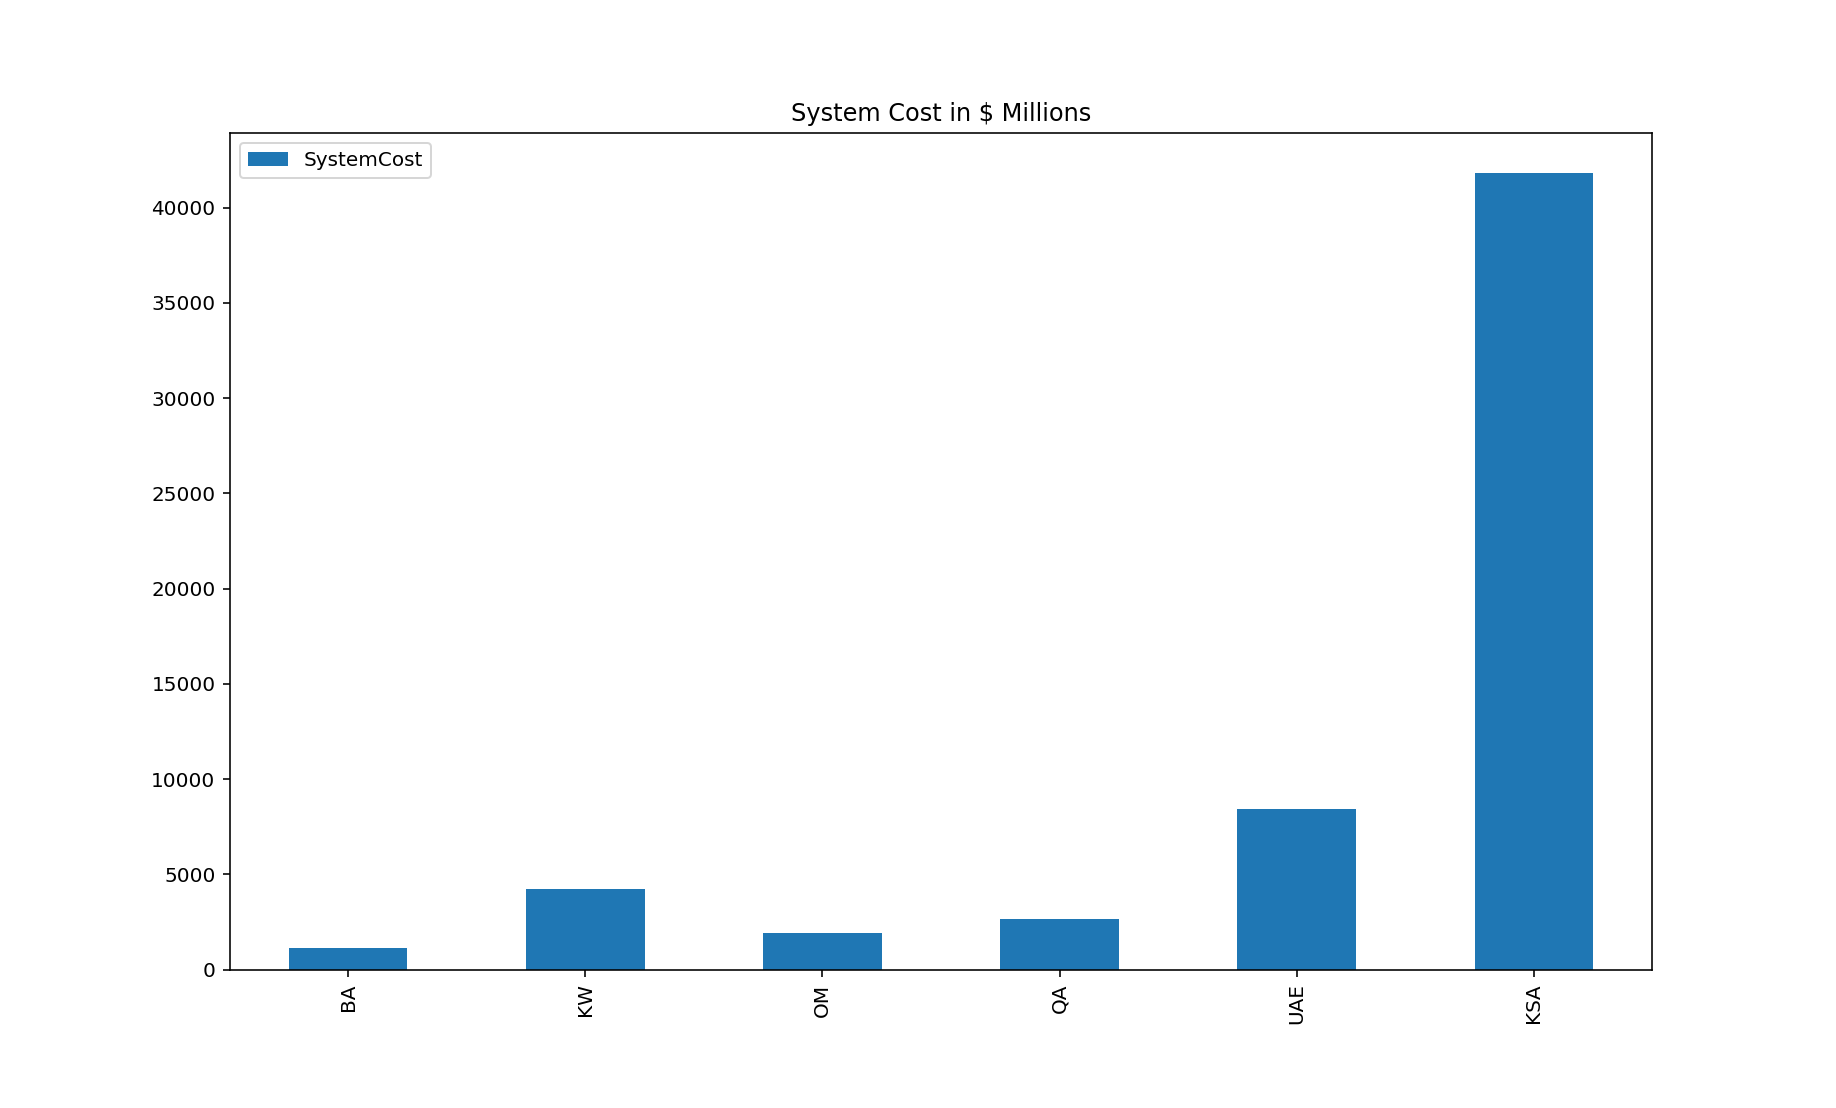

In [324]:
SystemCost2.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')


In [295]:
#Total output system cost in Millions $ (converted from euros €)
results1['OutputSystemCost'].sum().sum()*(1/0.90383675)/(1000000)

4811.7043073222876

In [325]:
#Total output system cost in $ (converted from euros €)
results2['OutputSystemCost'].sum().sum()*(1/0.90383675)/(1000000)

60133.909338389181

In [326]:
#Average electricity cost in $/MWh (converted from euros €)
(results1['OutputSystemCost'].sum()*(1/0.90383675)) / datain1['Demand']['DA'].sum()

BA            25.250413
KW            71.111747
OM            68.410118
QA            84.509312
SA_EOA        92.886550
SA_HAIL      100.803177
SA_NEOA       67.806415
SA_NWOA      265.175687
SA_QASSIM      5.746615
SA_RIYADH     88.180593
SA_SOA        78.458846
SA_WOA       155.217430
UAE           62.623358
dtype: float64

In [327]:
#Average electricity cost in $/MWh (converted from euros €)
KSA_Demand1 = datain1['Demand']['DA']['SA_EOA'].sum()+datain1['Demand']['DA']['SA_HAIL'].sum()+datain1['Demand']['DA']['SA_NEOA'].sum()+datain1['Demand']['DA']['SA_NWOA'].sum()+datain1['Demand']['DA']['SA_QASSIM'].sum()+datain1['Demand']['DA']['SA_RIYADH'].sum()+datain1['Demand']['DA']['SA_SOA'].sum()+datain1['Demand']['DA']['SA_WOA'].sum()
KSA_elec_cost1 = KSA_Cost1/KSA_Demand1
KSA_elec_cost1

105.71210002116322

In [328]:
#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain1['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand1 = pd.DataFrame(datain1['Demand']['DA'].sum())
System_demand1 = System_demand1.append(A, ignore_index=False)
System_demand1.columns = ['TotalDemand']
elec_cost1 = pd.Series(SystemCost1['SystemCost']*(1000000), index=SystemCost1.index)/pd.Series(System_demand1['TotalDemand'], index=System_demand1.index)
elec_cost1

BA            25.250413
KSA          105.712100
KW            71.111747
OM            68.410118
QA            84.509312
SA_EOA        92.886550
SA_HAIL      100.803177
SA_NEOA       67.806415
SA_NWOA      265.175687
SA_QASSIM      5.746615
SA_RIYADH     88.180593
SA_SOA        78.458846
SA_WOA       155.217430
UAE           62.623358
dtype: float64

<IPython.core.display.Javascript object>


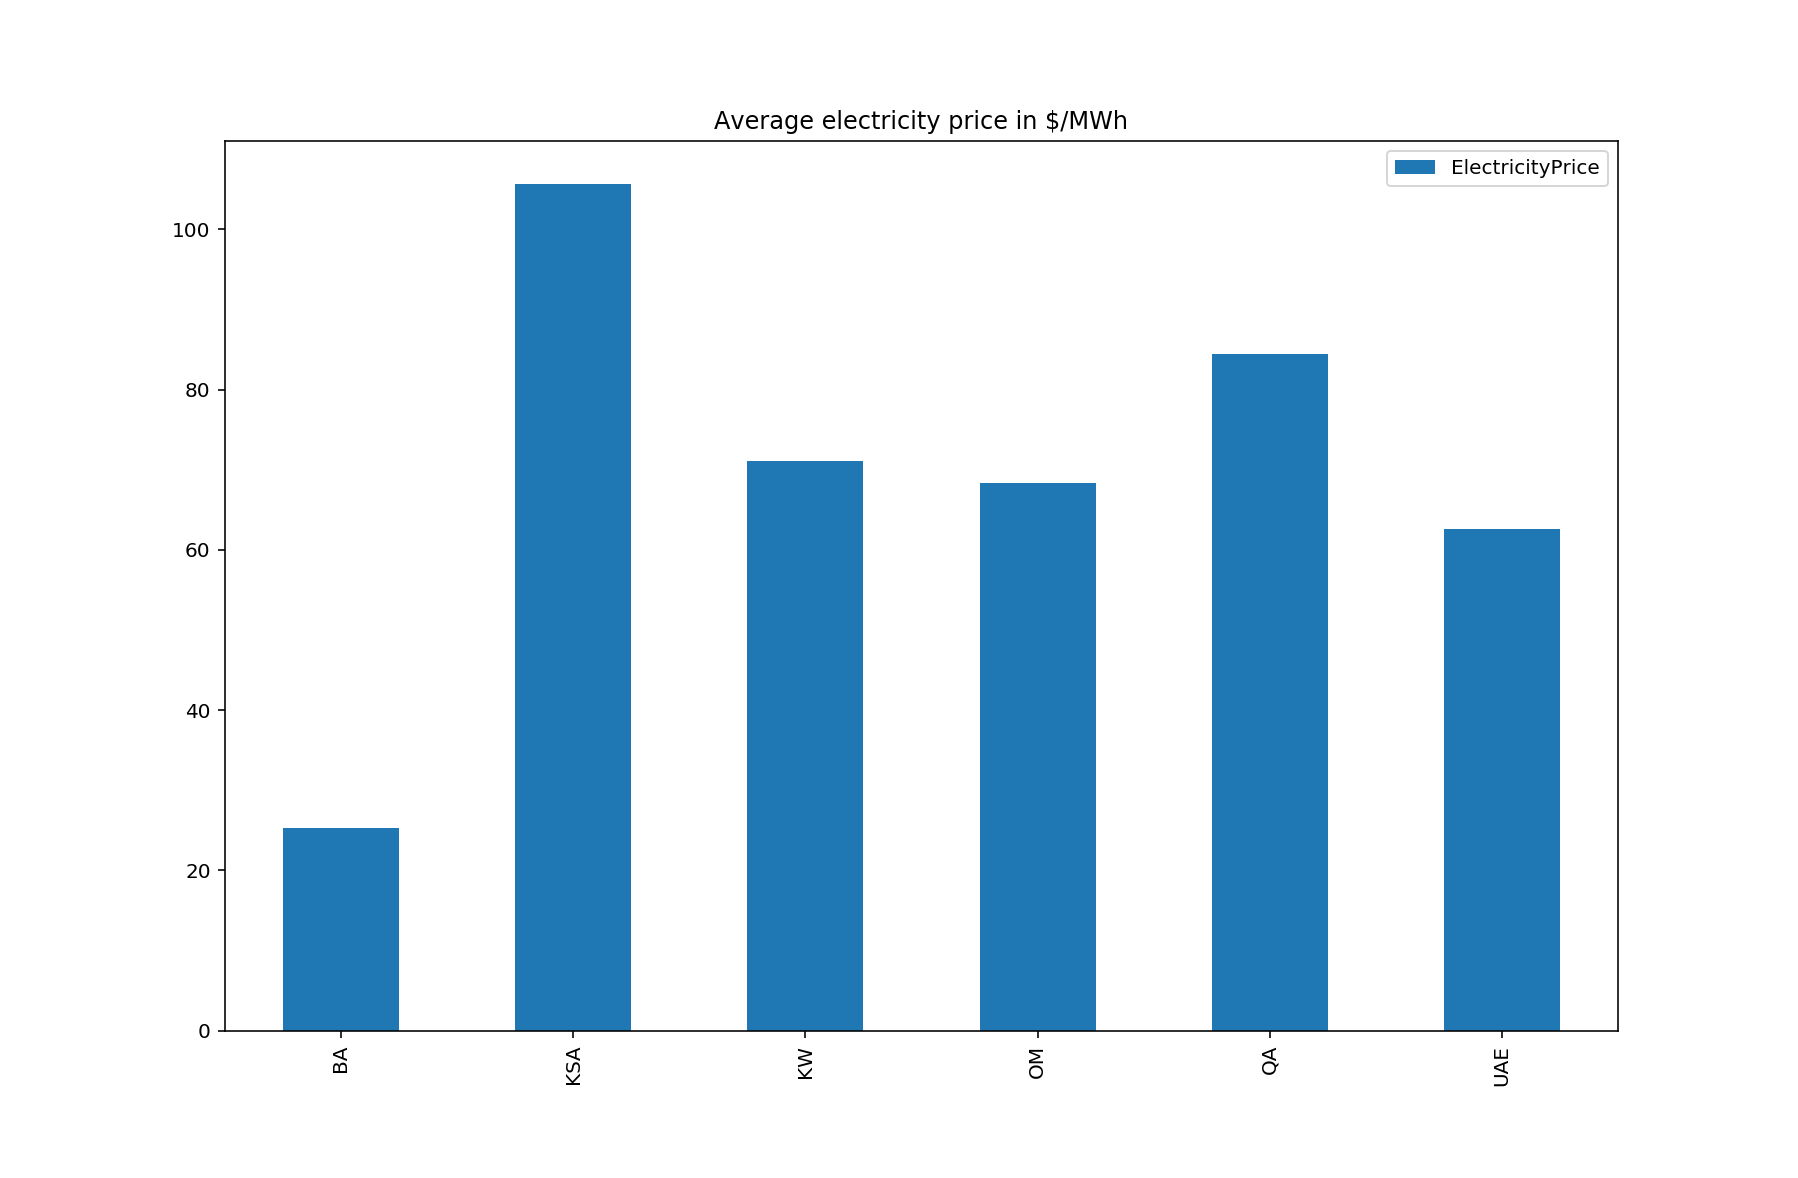

In [329]:
elec_cost11 = pd.DataFrame(elec_cost1,columns=['ElectricityPrice'])
elec_cost11.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [115]:
#Average electricity cost in $/MWh (converted from euros €)
(results2['OutputSystemCost'].sum()*(1/0.90383675)) / datain2['Demand']['DA'].sum()

BA           18.147470
KW            7.535863
OM           18.155079
QA            5.305313
SA_EOA        5.077060
SA_HAIL       4.111127
SA_NEOA      14.870970
SA_NWOA      35.243523
SA_QASSIM     0.167861
SA_RIYADH    10.193148
SA_SOA        6.794241
SA_WOA        6.178554
UAE           5.360722
dtype: float64

In [330]:
#Average electricity cost in $/MWh (converted from euros €)
KSA_Demand2 = datain2['Demand']['DA']['SA_EOA'].sum()+datain2['Demand']['DA']['SA_HAIL'].sum()+datain2['Demand']['DA']['SA_NEOA'].sum()+datain2['Demand']['DA']['SA_NWOA'].sum()+datain2['Demand']['DA']['SA_QASSIM'].sum()+datain2['Demand']['DA']['SA_RIYADH'].sum()+datain2['Demand']['DA']['SA_SOA'].sum()+datain2['Demand']['DA']['SA_WOA'].sum()
KSA_elec_cost2 = KSA_Cost2/KSA_Demand2
KSA_elec_cost2

110.16049972096934

In [331]:
#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain2['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand2 = pd.DataFrame(datain2['Demand']['DA'].sum())
System_demand2 = System_demand2.append(A, ignore_index=False)
System_demand2.columns = ['TotalDemand']
elec_cost2 = pd.Series(SystemCost2['SystemCost']*(1000000), index=SystemCost2.index)/pd.Series(System_demand2['TotalDemand'], index=System_demand2.index)
elec_cost2

BA            65.607021
KSA          110.160500
KW            59.711151
OM            61.501577
QA            64.085809
SA_EOA       100.394603
SA_HAIL      102.551922
SA_NEOA       67.837813
SA_NWOA      265.421559
SA_QASSIM      5.877628
SA_RIYADH     96.802219
SA_SOA        78.705666
SA_WOA       155.275709
UAE           64.586624
dtype: float64

<IPython.core.display.Javascript object>


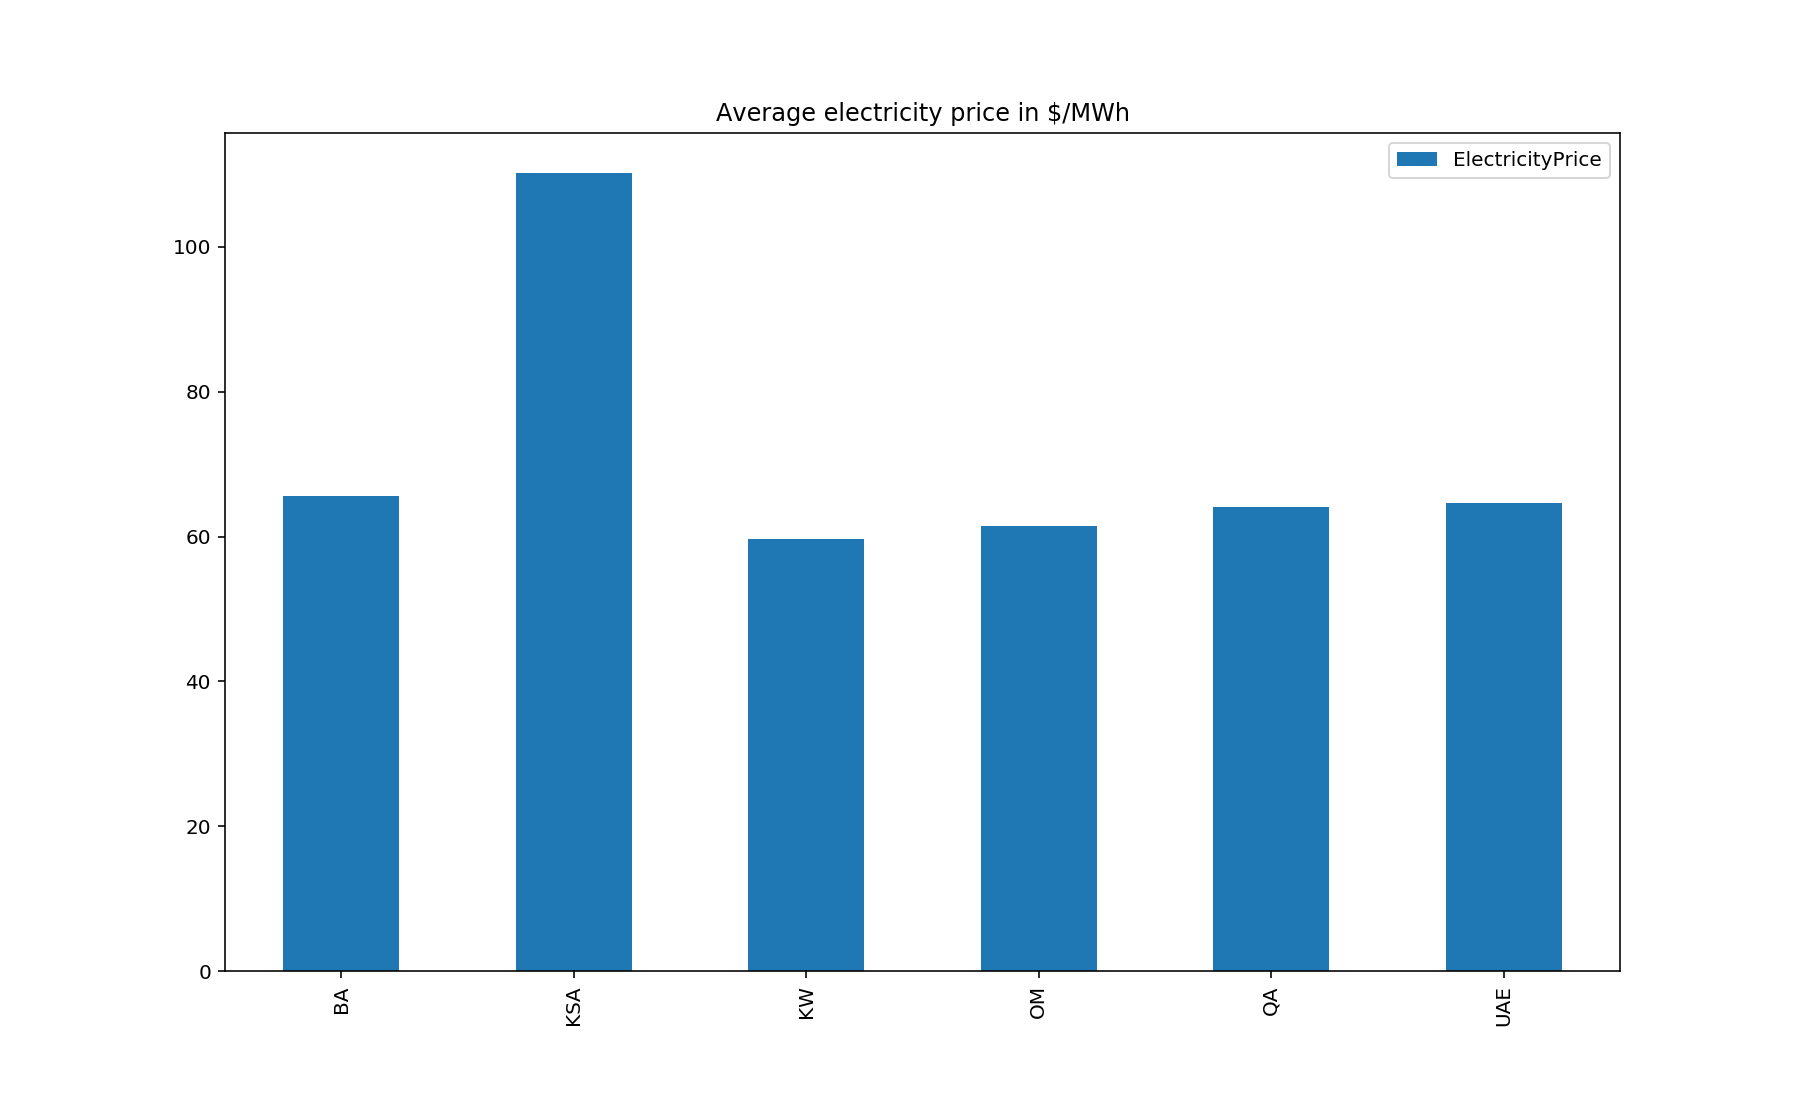

In [332]:
elec_cost22 = pd.DataFrame(elec_cost2,columns=['ElectricityPrice'])
elec_cost22.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [118]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results1['OutputPower'], inputs1, SpecifyFuels=None).head(5)

,BIO,GAS,HRD,LIG,NUC,OIL,PEA,SUN,WAT,WIN,WST,OTH,DSL,HFO,MSW,LFG
2016-01-01 00:00:00,0,29818.376802,0,0,0,8738.778403,0,0.0,0,0.133972,0,0,1453.014980,9666.0,0.0,0.339843
2016-01-01 01:00:00,0,29818.376802,0,0,0,9755.771782,0,0.0,0,0.133972,0,0,436.021602,9666.0,0.0,0.339843
2016-01-01 02:00:00,0,29818.355610,0,0,0,9755.771782,0,0.0,0,0.155163,0,0,436.021602,9666.0,0.0,0.339843
2016-01-01 03:00:00,0,29609.977287,0,0,0,8833.100782,0,0.0,0,0.163486,0,0,368.463602,9666.0,0.0,0.339843
2016-01-01 04:00:00,0,29380.371394,0,0,0,7886.026782,0,0.0,0,0.179379,0,0,347.862602,9666.0,0.0,0.339843


In [333]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results2['OutputPower'], inputs2, SpecifyFuels=None).head(5)

,BIO,GAS,HRD,LIG,NUC,OIL,PEA,SUN,WAT,WIN,WST,OTH,DSL,HFO,MSW,LFG
2016-01-01 00:00:00,0,44525.927963,0,0,0,209.0,0,0.0,0,0.133972,0,0,419.185,4522.057222,0.0,0.339843
2016-01-01 01:00:00,0,44525.927963,0,0,0,209.0,0,0.0,0,0.133972,0,0,419.185,4522.057222,0.0,0.339843
2016-01-01 02:00:00,0,44525.906772,0,0,0,209.0,0,0.0,0,0.155163,0,0,419.185,4522.057222,0.0,0.339843
2016-01-01 03:00:00,0,43847.278448,0,0,0,209.0,0,0.0,0,0.163486,0,0,351.627,4069.636222,0.0,0.339843
2016-01-01 04:00:00,0,43004.550556,0,0,0,209.0,0,0.0,0,0.179379,0,0,331.026,3735.684222,0.0,0.339843


In [334]:
NewOutputFlow1 = results1['OutputFlow'].copy()
OriginalColumns1 = []
reverseindex = []
for j,column in enumerate(NewOutputFlow1):
    A = column.split(' -> ')
    OriginalColumns1.append(A)
    B = list(reversed(A))
    if B in OriginalColumns1:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns1) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow1.iloc[:,D] = NewOutputFlow1.iloc[:,D] - NewOutputFlow1.iloc[:,j]
NewOutputFlow1 = NewOutputFlow1.drop(NewOutputFlow1.columns[reverseindex], axis=1).copy()
NewOutputFlow1.head(5)

,BA -> KW,BA -> SA_EOA,BA -> UAE,KW -> SA_EOA,KW -> UAE,OM -> UAE,QA -> BA,QA -> KW,QA -> SA_EOA,QA -> UAE,SA_EOA -> SA_RIYADH,SA_HAIL -> SA_NEOA,SA_QASSIM -> SA_HAIL,SA_QASSIM -> SA_WOA,SA_RIYADH -> SA_QASSIM,SA_WOA -> SA_SOA,UAE -> SA_EOA
2016-01-01 00:00:00,-881.375195,0.0,0.0,668.624805,0.0,400.0,0.0,0.0,1131.375195,368.624805,1573.295,418.724,750.253,1604.172,3300.0,1293.853222,0.0
2016-01-01 01:00:00,-881.375195,0.0,0.0,668.624805,0.0,400.0,0.0,0.0,1131.375195,368.624805,1573.295,418.724,750.253,1604.172,3300.0,1293.853222,0.0
2016-01-01 02:00:00,-881.375195,0.0,0.0,668.624805,0.0,400.0,0.0,0.0,1131.375195,368.624805,1573.295,418.724,750.253,1604.172,3300.0,1293.853222,0.0
2016-01-01 03:00:00,-843.375195,0.0,0.0,706.624805,0.0,400.0,0.0,0.0,1093.375195,406.624805,1689.487,402.823,721.739,1665.734,3300.0,1176.597222,0.0
2016-01-01 04:00:00,-815.245195,0.0,0.0,734.754805,0.0,400.0,0.0,0.0,1065.245195,434.754805,2025.660,392.718,703.466,1705.694,3300.0,1161.430222,0.0


<IPython.core.display.Javascript object>


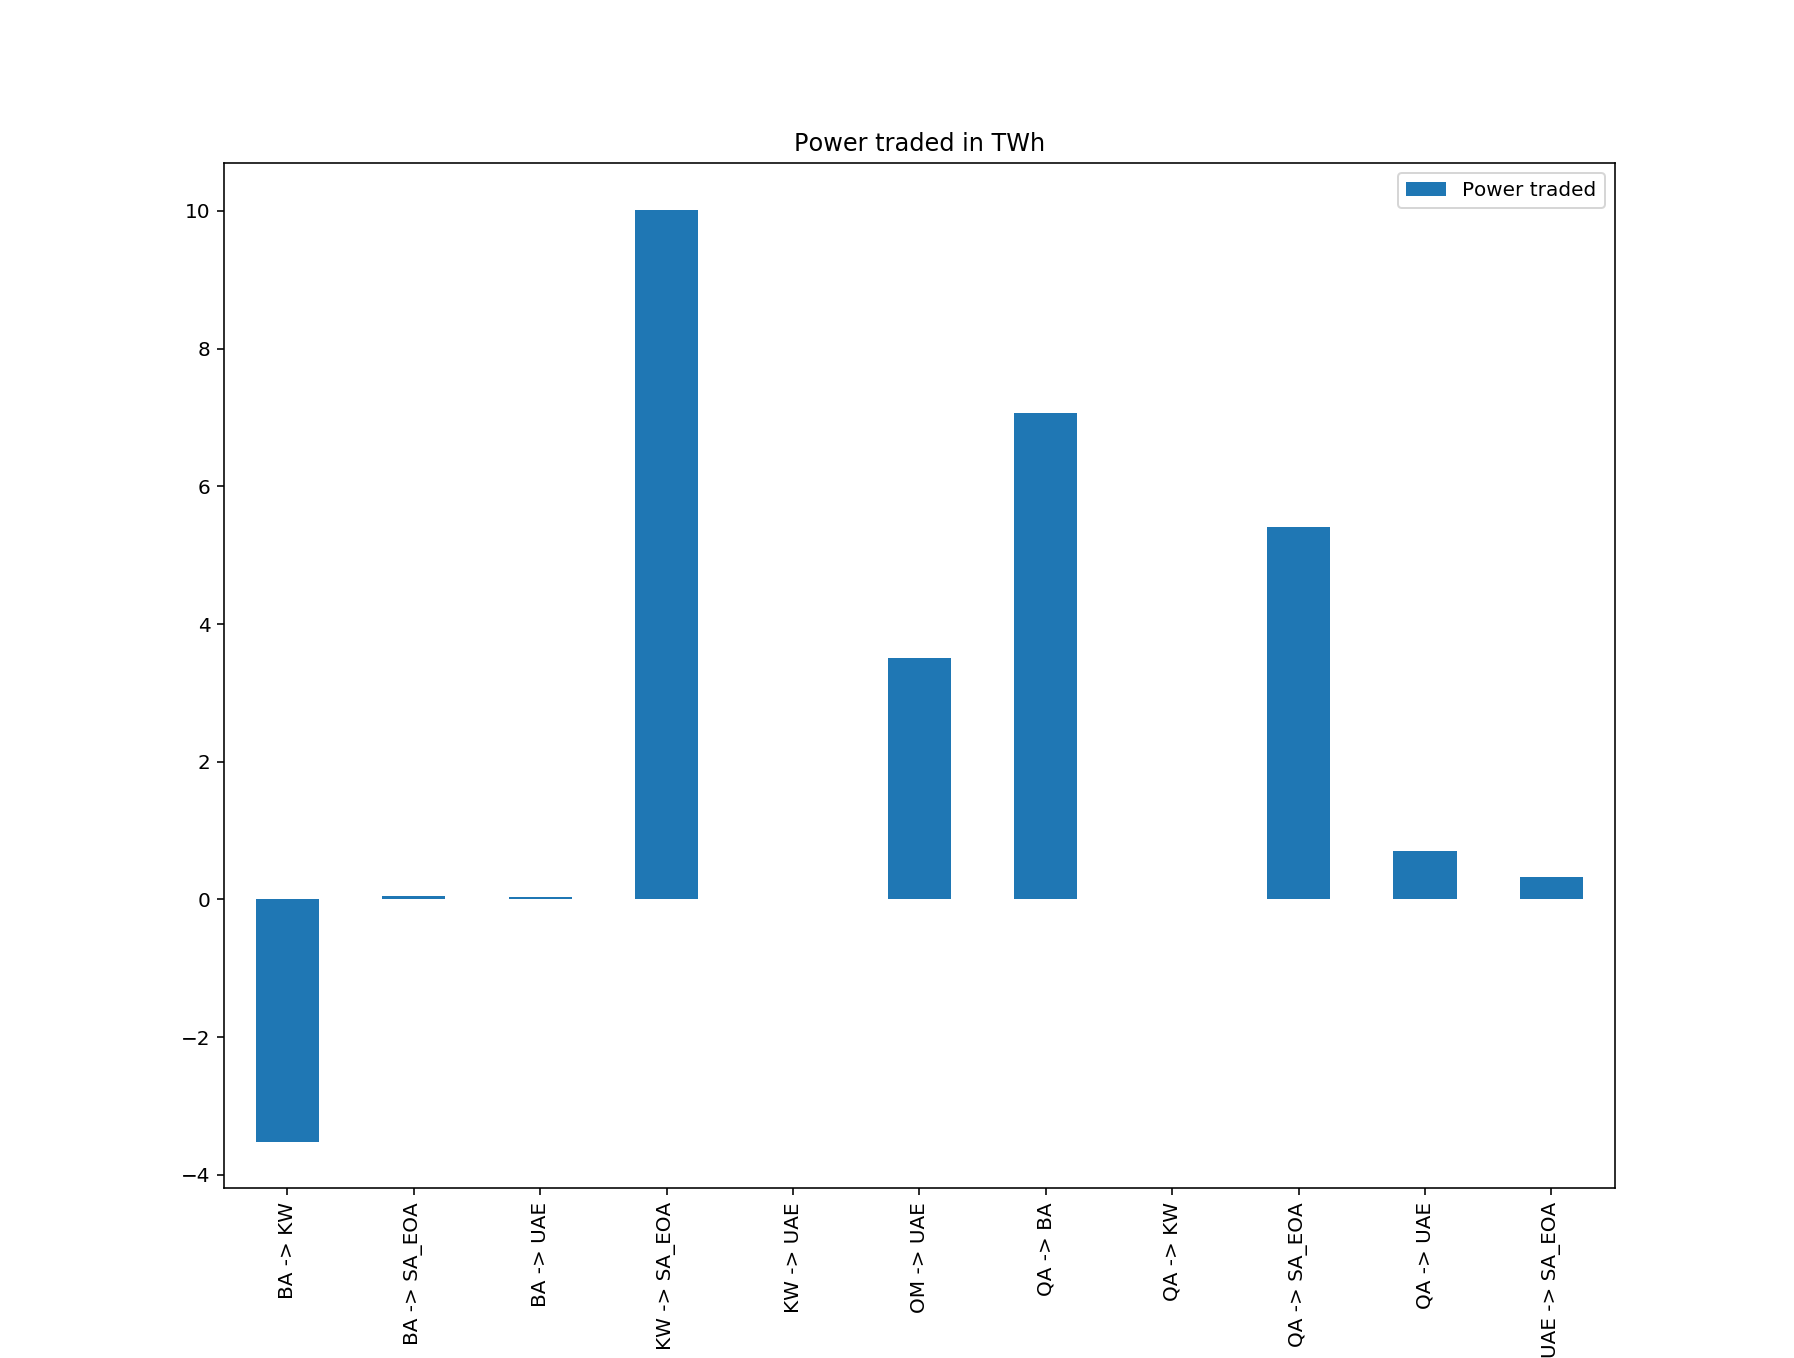

In [359]:
pd.DataFrame((NewOutputFlow1.sum()/(1000000)),columns=['Power traded']).drop(['SA_EOA -> SA_RIYADH','SA_HAIL -> SA_NEOA','SA_QASSIM -> SA_HAIL','SA_QASSIM -> SA_WOA','SA_RIYADH -> SA_QASSIM','SA_WOA -> SA_SOA']).plot.bar(title='Power traded in TWh')


In [336]:
NewOutputFlow2 = results2['OutputFlow'].copy()
OriginalColumns2 = []
reverseindex = []
for j,column in enumerate(NewOutputFlow2):
    A = column.split(' -> ')
    OriginalColumns2.append(A)
    B = list(reversed(A))
    if B in OriginalColumns2:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns2) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow2.iloc[:,D] = NewOutputFlow2.iloc[:,D] - NewOutputFlow2.iloc[:,j]
NewOutputFlow2 = NewOutputFlow2.drop(NewOutputFlow2.columns[reverseindex], axis=1).copy()
NewOutputFlow2.head(5)

,SA_EOA -> SA_RIYADH,SA_HAIL -> SA_NEOA,SA_QASSIM -> SA_HAIL,SA_QASSIM -> SA_WOA,SA_RIYADH -> SA_QASSIM,SA_WOA -> SA_SOA
2016-01-01 00:00:00,-226.705,418.724,750.253,1604.172,3300.0,1293.853222
2016-01-01 01:00:00,-226.705,418.724,750.253,1604.172,3300.0,1293.853222
2016-01-01 02:00:00,-226.705,418.724,750.253,1604.172,3300.0,1293.853222
2016-01-01 03:00:00,-110.513,402.823,721.739,1665.734,3300.0,1176.597222
2016-01-01 04:00:00,225.660,392.718,703.466,1705.694,3300.0,1161.430222


<IPython.core.display.Javascript object>


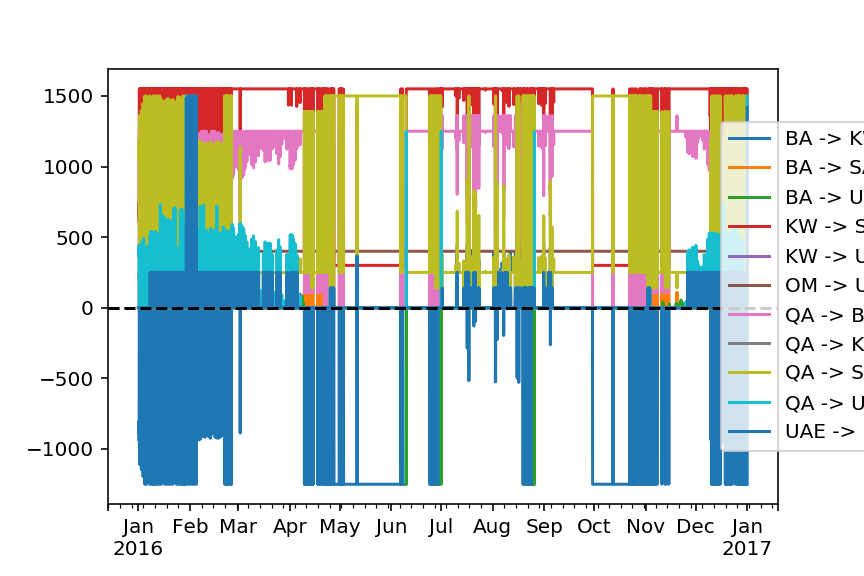

In [337]:
columns = []
for i,column in enumerate(NewOutputFlow1):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows1 = NewOutputFlow1.drop(NewOutputFlow1.columns[columns], axis=1).copy()
ax = GCCFlows1.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

In [ ]:
columns = []
for i,column in enumerate(NewOutputFlow2):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows2 = NewOutputFlow2.drop(NewOutputFlow2.columns[columns], axis=1).copy()
ax = GCCFlows2.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

<IPython.core.display.Javascript object>


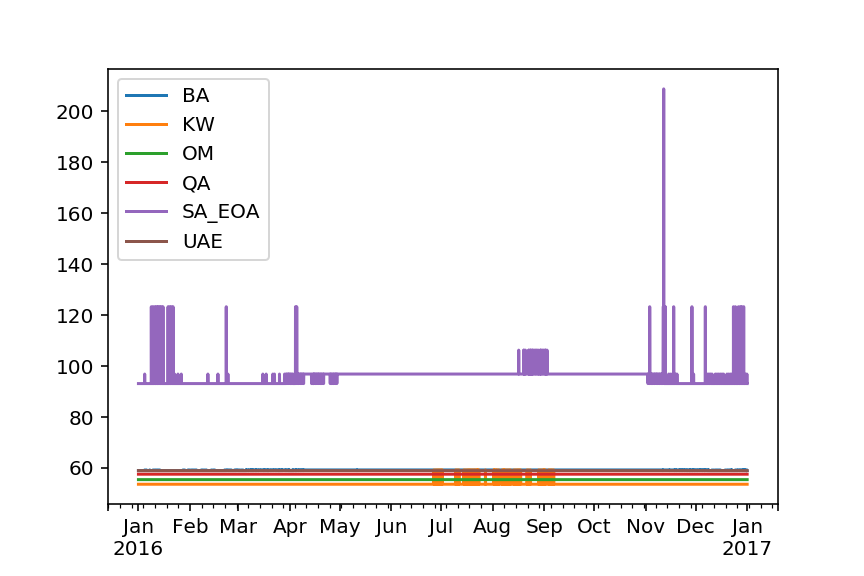

In [338]:
results1['ShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


<IPython.core.display.Javascript object>


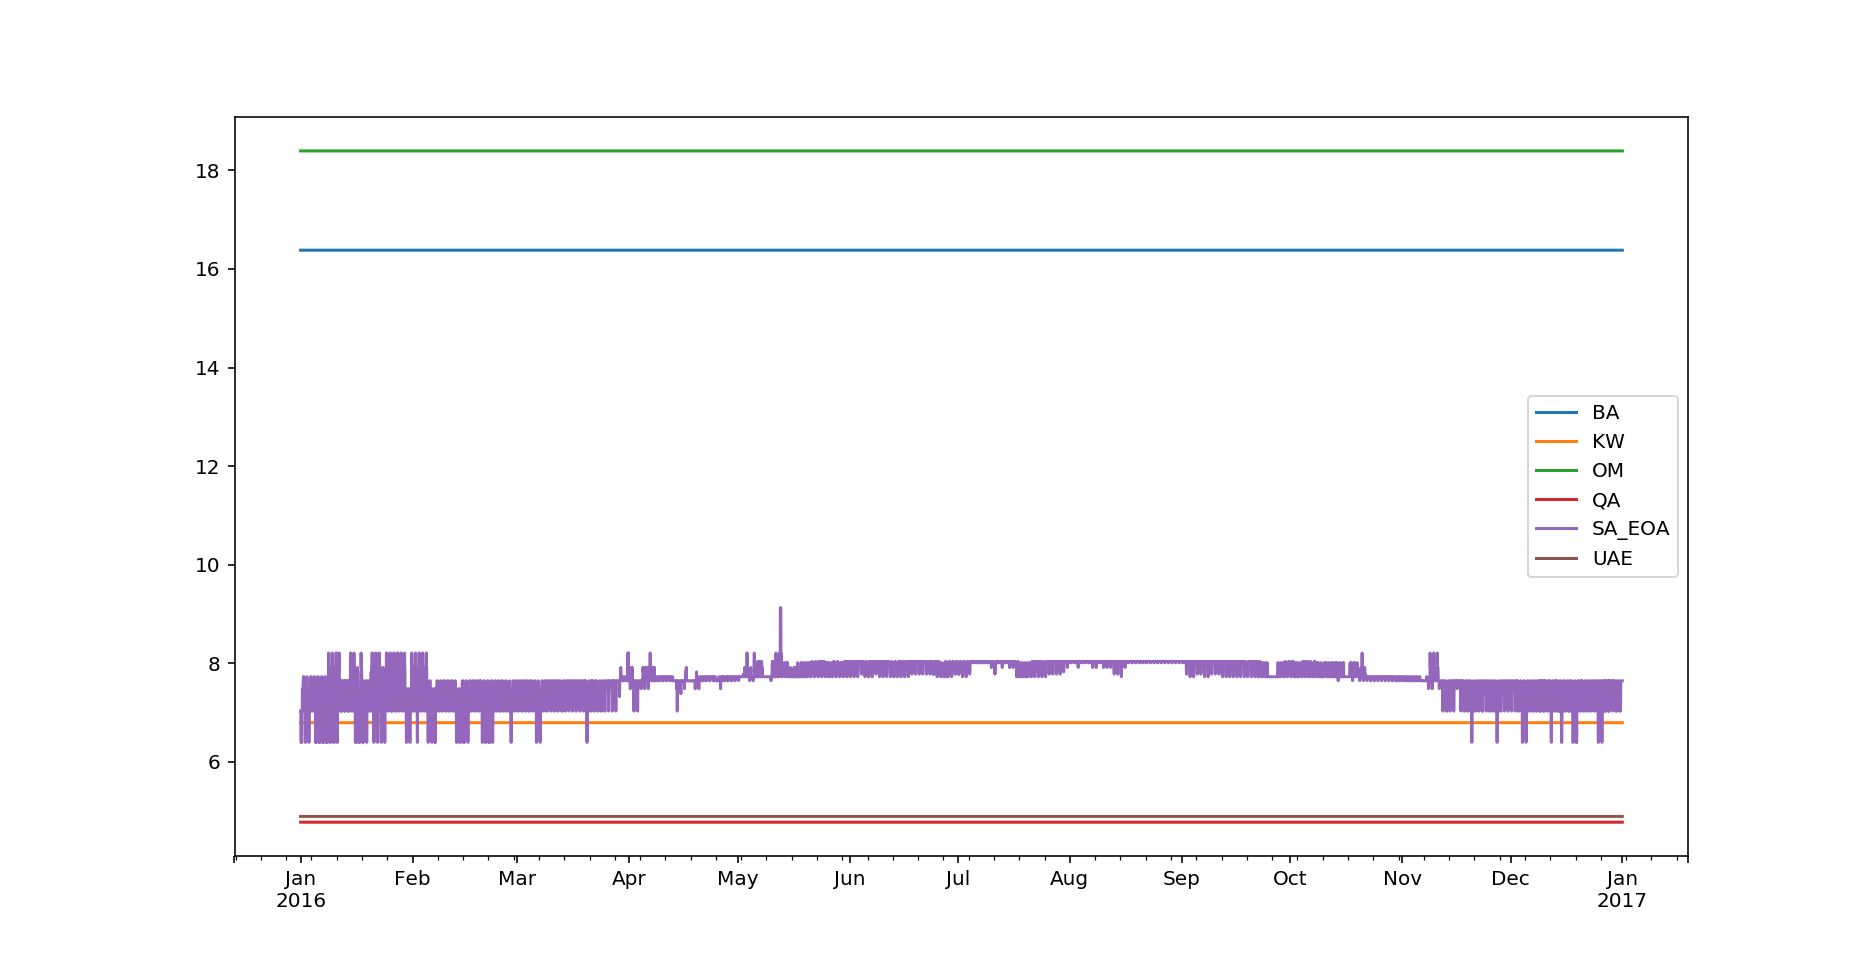

In [139]:
results2['ShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


In [339]:
PPindicators1 = post.get_indicators_powerplant(inputs1,results1)
PPindicators1.head(5)

,PowerCapacity,Zone,Technology,Fuel,startups,CF,Generation
"[0L, 1L, 2L, 3L, 4L, ... _EOA - STUR - GAS -",6876.00000,SA_EOA,STUR,GAS,0,1.000000,6.039878e+07
"[12L, 13L, 14L, 15L, ... _EOA - GTUR - GAS -",5700.15305,SA_EOA,GTUR,GAS,2,0.001895,9.486888e+04
"[30L, 31L, 32L, 33L, 34L, 35L] - SA_EOA - COMC - GAS -",3990.00000,SA_EOA,COMC,GAS,0,1.000000,3.504816e+07
"[58L, 59L, 60L, 61L, 62L, 63L] - SA_EOA - GTUR - DSL -",121.60000,SA_EOA,GTUR,DSL,3,0.010996,1.174500e+04
"[105L, 106L, 107L, 1 ... _EOA - ICEN - GAS -",11700.00000,SA_EOA,ICEN,GAS,55,0.386678,3.973997e+07


In [340]:
PPindicators2 = post.get_indicators_powerplant(inputs2,results2)
PPindicators2.head(5)

,PowerCapacity,Zone,Technology,Fuel,startups,CF,Generation
"[0L, 1L, 2L, 3L, 4L, ... _EOA - STUR - GAS -",6876.00000,SA_EOA,STUR,GAS,0,1.000000,6.039878e+07
"[12L, 13L, 14L, 15L, ... _EOA - GTUR - GAS -",5700.15305,SA_EOA,GTUR,GAS,3,0.012275,6.145975e+05
"[30L, 31L, 32L, 33L, 34L, 35L] - SA_EOA - COMC - GAS -",3990.00000,SA_EOA,COMC,GAS,0,1.000000,3.504816e+07
"[58L, 59L, 60L, 61L, 62L, 63L] - SA_EOA - GTUR - DSL -",121.60000,SA_EOA,GTUR,DSL,3,0.010996,1.174500e+04
"[105L, 106L, 107L, 1 ... _EOA - ICEN - GAS -",11700.00000,SA_EOA,ICEN,GAS,96,0.467745,4.807147e+07


In [341]:
fuels = PPindicators1.Fuel.unique()
countries = PPindicators1.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators1[(PPindicators1.Fuel == f) & (PPindicators1.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results1['OutputFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry1 = GenPerCountry
A = GenPerCountry1.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry1 = GenPerCountry1.append(A, ignore_index=False)
GenPerCountry1

,GAS,DSL,SUN,OIL,HFO,LFG,MSW,WIN,NUC,WST,FlowIn
SA_EOA,1.35282e+08,11745,10845.1,0,0,0,0,0,0.0,0.0,0.000000e+00
SA_HAIL,0,0,0,2.59024e+06,0,0,0,0,0.0,0.0,3.346084e+06
SA_NEOA,0,338955,0,1.19985e+06,0,0,0,0,0.0,0.0,6.004220e+06
SA_NWOA,0,1.4175e+06,1134.6,4.97187e+06,0,0,0,0,0.0,0.0,0.000000e+00
SA_QASSIM,0,18792,0,340796,0,0,0,0,0.0,0.0,1.510818e+07
SA_RIYADH,8.63453e+07,11745,12047.4,446460,0,0,0,0,0.0,0.0,0.000000e+00
SA_SOA,1.77022e+07,14964.9,516.433,4.28708e+06,0,0,0,0,0.0,0.0,1.442419e+07
SA_WOA,2.54736e+07,11745,9843.22,1.43951e+07,6.90651e+07,0,0,0,0.0,0.0,0.000000e+00
BA,6.53992e+06,0,6197.2,0,0,0,0,0,0.0,0.0,1.049298e+07
KW,8.37982e+07,0,17558.7,174471,0,0,0,0,0.0,0.0,0.000000e+00


In [342]:
fuels = PPindicators2.Fuel.unique()
countries = PPindicators2.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators2[(PPindicators2.Fuel == f) & (PPindicators2.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results2['OutputFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry2 = GenPerCountry
A = GenPerCountry2.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry2 = GenPerCountry2.append(A, ignore_index=False)
GenPerCountry2

,GAS,DSL,SUN,OIL,HFO,LFG,MSW,WIN,NUC,WST,FlowIn
SA_EOA,1.44133e+08,11745,10845.1,0,0,0,0,0,0.0,0.0,0.000000e+00
SA_HAIL,0,0,0,2.63517e+06,0,0,0,0,0.0,0.0,3.301148e+06
SA_NEOA,0,339183,0,1.19986e+06,0,0,0,0,0.0,0.0,6.003984e+06
SA_NWOA,0,1.45048e+06,1134.81,4.93873e+06,0,0,0,0,0.0,0.0,0.000000e+00
SA_QASSIM,0,18792,0,349255,0,0,0,0,0.0,0.0,1.509972e+07
SA_RIYADH,9.31255e+07,11745,12047.4,446460,0,0,0,0,0.0,0.0,0.000000e+00
SA_SOA,1.77022e+07,14939.9,516.433,4.32744e+06,0,0,0,0,0.0,0.0,1.438385e+07
SA_WOA,2.54736e+07,11745,9843.22,1.43118e+07,6.92342e+07,0,0,0,0.0,0.0,0.000000e+00
BA,1.70329e+07,0,6197.2,0,0,0,0,0,0.0,0.0,0.000000e+00
KW,7.02595e+07,0,17558.7,174471,0,0,0,0,0.0,0.0,0.000000e+00


In [343]:
# With Trade - Without Trade (The change due to trade: '+':increase ,,, '-':decrease)
GenPerCountry_diff = GenPerCountry1 - GenPerCountry2
GenPerCountry_diff.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

,GAS,DSL,SUN,OIL,HFO,LFG,MSW,WIN,NUC,WST,FlowIn
BA,-1.0493e+07,0,0,0,0,0,0,0,0.0,0.0,1.049298e+07
KW,1.35386e+07,0,0,0,0,0,0,0,0.0,0.0,0.000000e+00
OM,3.5136e+06,0,0,0,0,0,0,0,0.0,0.0,0.000000e+00
QA,1.3176e+07,0,0,0,0,0,0,0,0.0,0.0,0.000000e+00
UAE,-3.92406e+06,0,0,0,0,0,0,0,0.0,0.0,3.924056e+06
KSA,-1.56314e+07,-33178.3,-0.214934,22635.5,-169098,0,0,0,0.0,0.0,9.396420e+04


In [344]:
# With Trade - Without Trade (The change due to trade: '+':increase ,,, '-':decrease)  [in Millions $]
(SystemCost1 - SystemCost2).drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

,SystemCost
BA,-687.640100
KW,803.189815
OM,215.471615
QA,839.125307
UAE,-256.018646
KSA,-1689.369353


In [345]:
#Total output system cost in Millions $ (converted from euros €)
((results1['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE'])
(results1['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost1 = (results1['OutputSystemCost'].sum()['SA_EOA']+results1['OutputSystemCost'].sum()['SA_HAIL']+results1['OutputSystemCost'].sum()['SA_NEOA']+results1['OutputSystemCost'].sum()['SA_NWOA']+results1['OutputSystemCost'].sum()['SA_QASSIM']+results1['OutputSystemCost'].sum()['SA_RIYADH']+results1['OutputSystemCost'].sum()['SA_SOA']+results1['OutputSystemCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost1/(1000000)

#Total output system cost in Millions $ (converted from euros €)
(results2['OutputSystemCost'].sum()*(1/0.90383675))/(1000000)
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost2 = (results2['OutputSystemCost'].sum()['SA_EOA']+results2['OutputSystemCost'].sum()['SA_HAIL']+results2['OutputSystemCost'].sum()['SA_NEOA']+results2['OutputSystemCost'].sum()['SA_NWOA']+results2['OutputSystemCost'].sum()['SA_QASSIM']+results2['OutputSystemCost'].sum()['SA_RIYADH']+results2['OutputSystemCost'].sum()['SA_SOA']+results2['OutputSystemCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost2/(1000000)

41835.667815448629

<IPython.core.display.Javascript object>


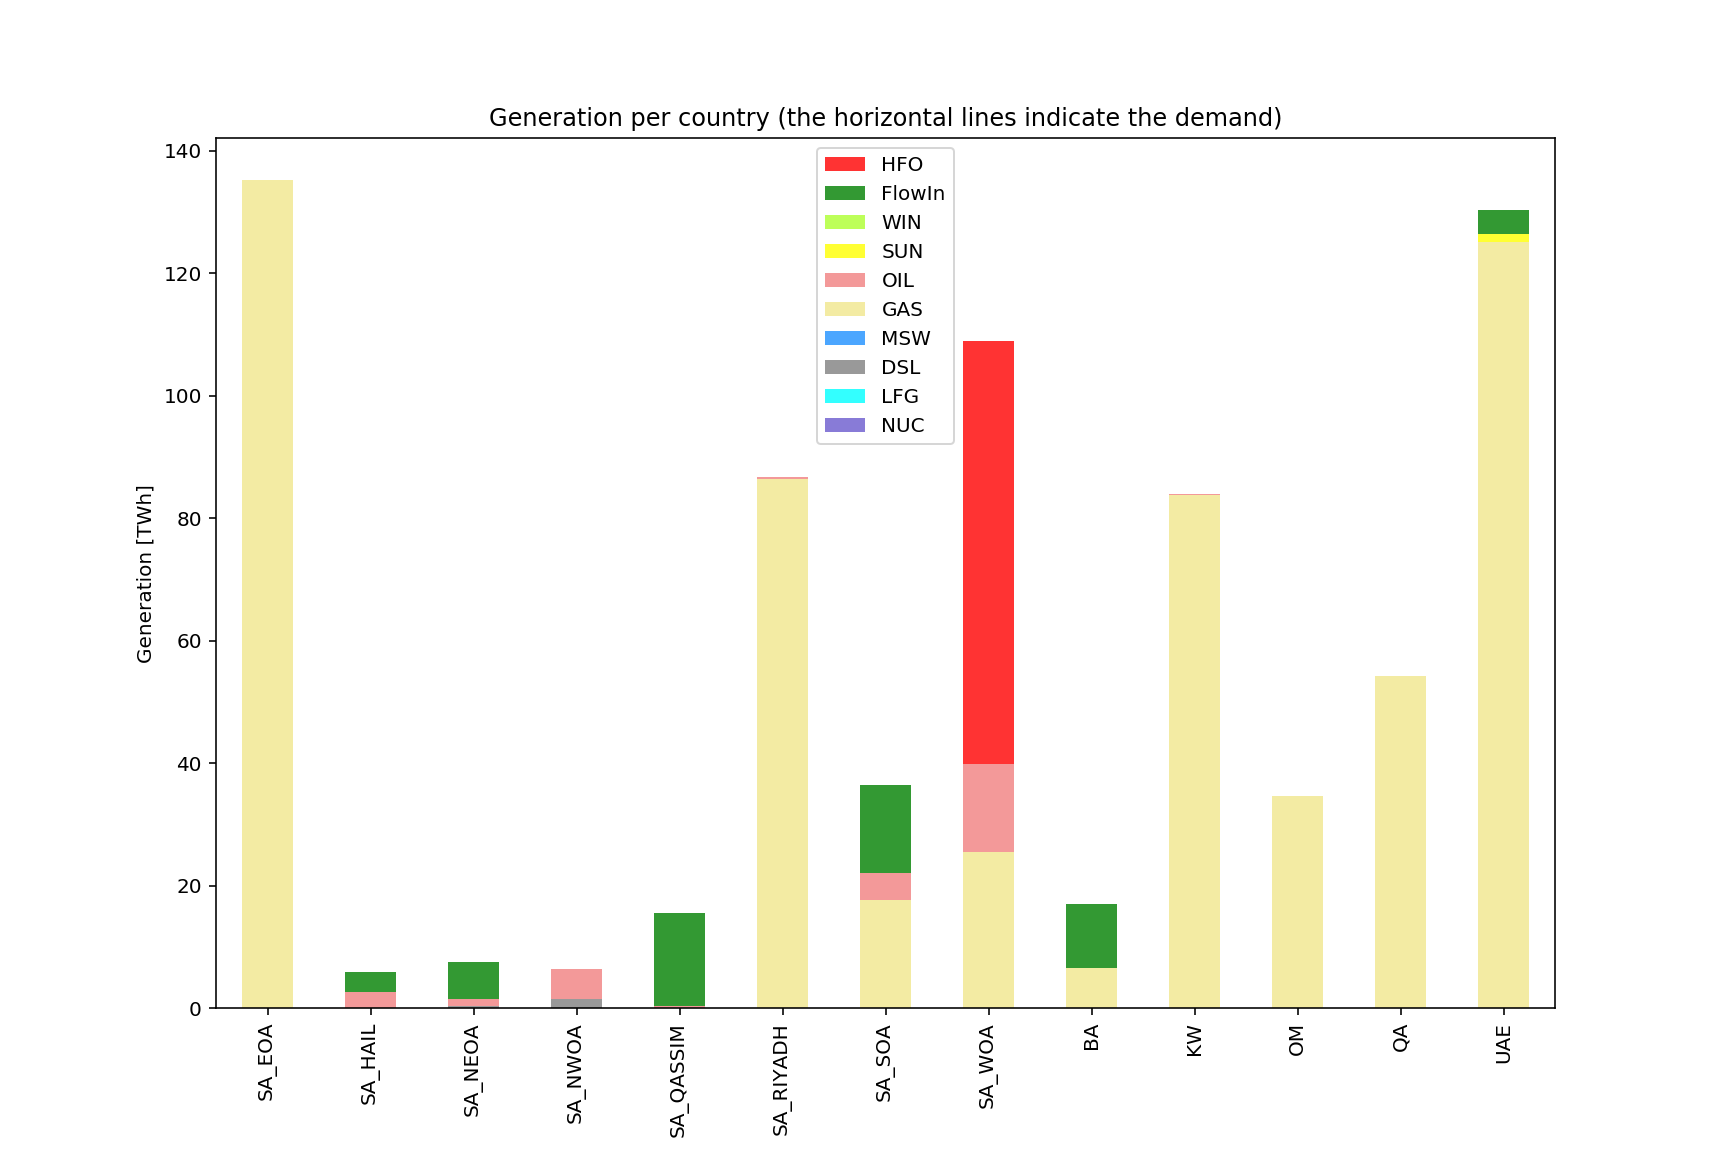

In [346]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain1,results1,PPindicators1)

<IPython.core.display.Javascript object>


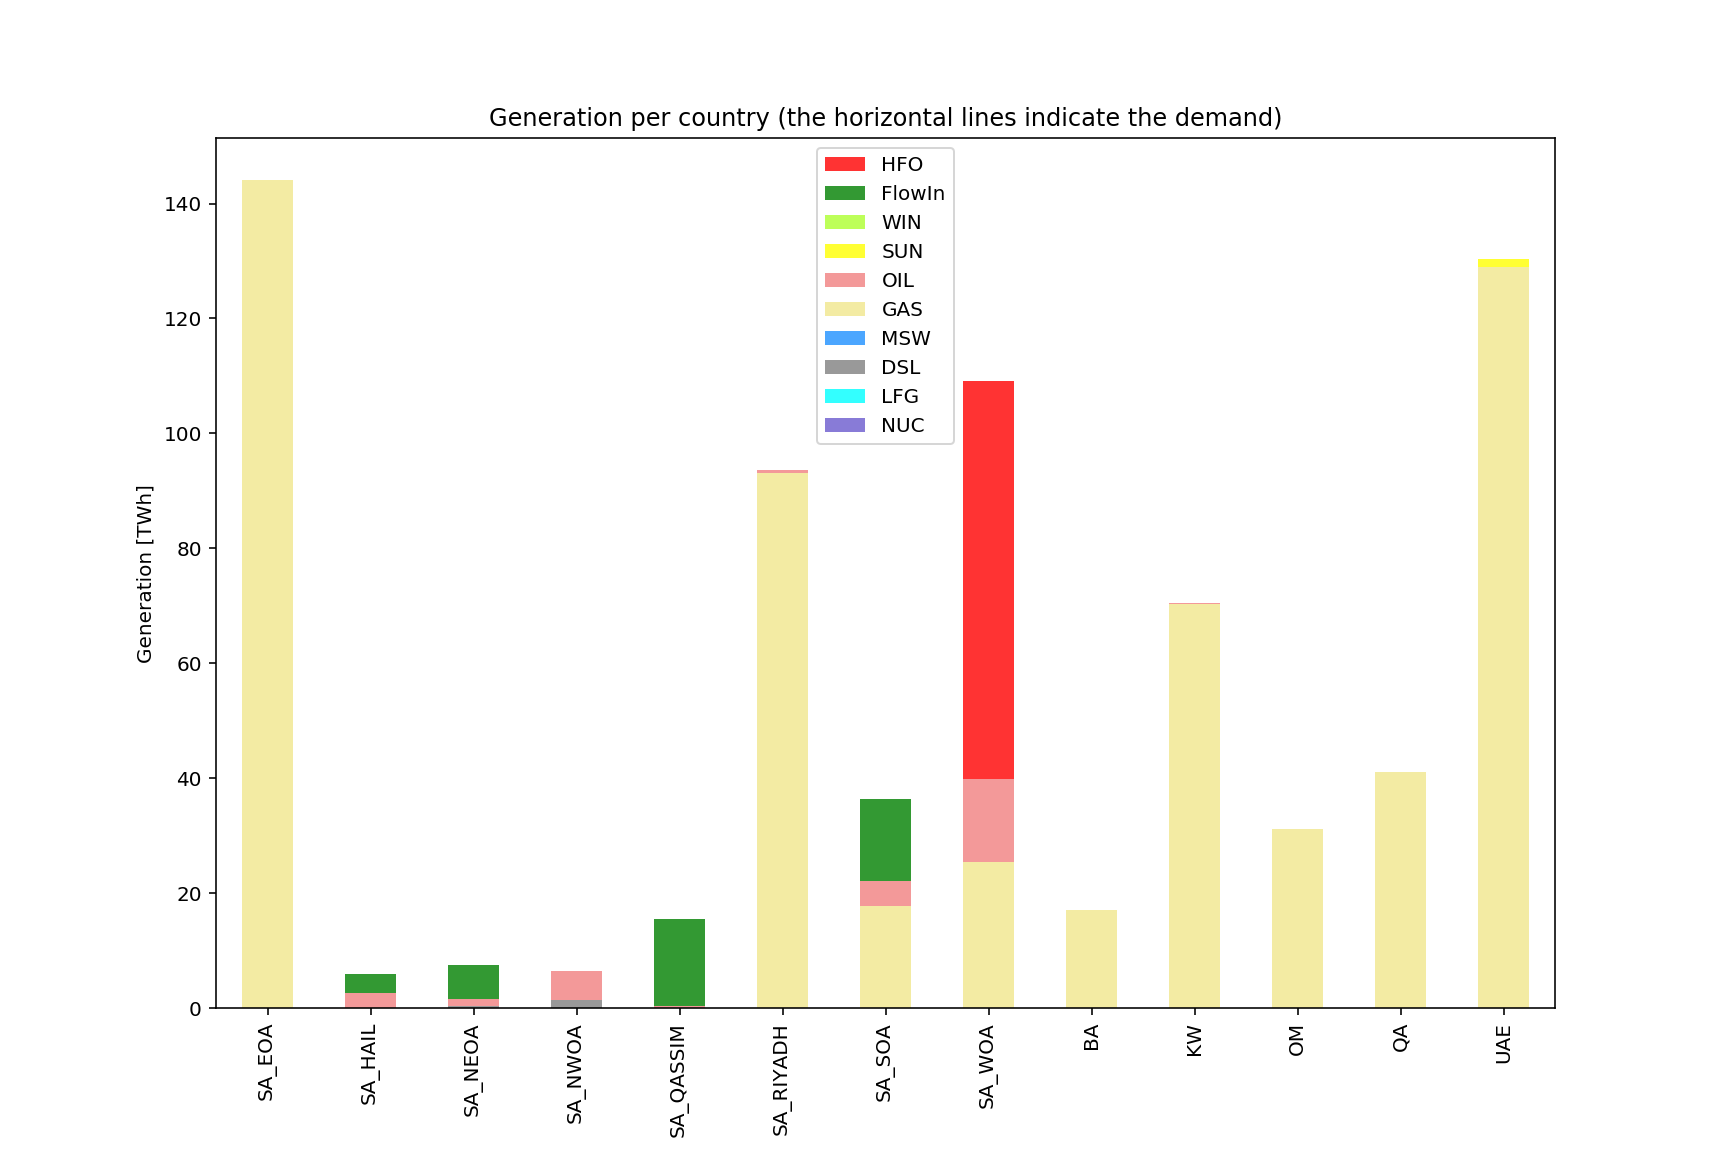

In [357]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain2,results2,PPindicators2)

In [347]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs1, results1).head(5)

,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA,OM,KW,BA,QA,UAE
2016-01-01 00:00:00,-226.705,1726.705,-945.575,-331.529,-310.318778,-1293.853222,0.0,-418.724,400.0,1550.0,-881.375195,1500.0,-768.624805
2016-01-01 01:00:00,-226.705,1726.705,-945.575,-331.529,-310.318778,-1293.853222,0.0,-418.724,400.0,1550.0,-881.375195,1500.0,-768.624805
2016-01-01 02:00:00,-226.705,1726.705,-945.575,-331.529,-310.318778,-1293.853222,0.0,-418.724,400.0,1550.0,-881.375195,1500.0,-768.624805
2016-01-01 03:00:00,-110.513,1610.513,-912.527,-318.916,-489.136778,-1176.597222,0.0,-402.823,400.0,1550.0,-843.375195,1500.0,-806.624805
2016-01-01 04:00:00,225.660,1274.340,-890.840,-310.748,-544.263778,-1161.430222,0.0,-392.718,400.0,1550.0,-815.245195,1500.0,-834.754805


In [348]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs2, results2).head(5)

,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA,OM,KW,BA,QA,UAE
2016-01-01 00:00:00,-226.705,3526.705,-945.575,-331.529,-310.318778,-1293.853222,0.0,-418.724,0.0,0.0,0.0,0.0,0.0
2016-01-01 01:00:00,-226.705,3526.705,-945.575,-331.529,-310.318778,-1293.853222,0.0,-418.724,0.0,0.0,0.0,0.0,0.0
2016-01-01 02:00:00,-226.705,3526.705,-945.575,-331.529,-310.318778,-1293.853222,0.0,-418.724,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00,-110.513,3410.513,-912.527,-318.916,-489.136778,-1176.597222,0.0,-402.823,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00,225.660,3074.340,-890.840,-310.748,-544.263778,-1161.430222,0.0,-392.718,0.0,0.0,0.0,0.0,0.0


In [349]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs1, results1).head(5)

,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA,OM,KW,BA,QA,UAE
2016-01-01 00:00:00,774665.044935,450735.283916,4764.017797,5220.079413,838483.108849,195225.536236,168221.268564,2024.446931,142974.935728,340700.220847,4084.886811,254149.071906,503624.342405
2016-01-01 01:00:00,774665.044935,450735.283916,4764.017797,5220.079413,838483.108849,195225.536236,150916.244678,2024.446931,142974.935728,340700.220847,4084.886811,254149.071906,503624.342405
2016-01-01 02:00:00,774665.044935,450735.283916,4764.017797,5220.079413,838483.108849,195225.536236,150916.244678,2024.446931,142974.935728,340700.220847,4084.886811,254149.071906,503623.092771
2016-01-01 03:00:00,774665.044935,423642.530039,4764.017797,5220.079413,782701.357714,195225.536236,131255.662962,2024.446931,140423.039206,333121.454925,4084.886811,252380.778041,493620.809247
2016-01-01 04:00:00,774665.044935,381699.843913,4764.017797,5220.079413,741526.373895,195225.536236,125260.404904,2024.446931,138529.625105,325902.484669,4084.886811,249783.596426,483097.379988


In [350]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs2, results2).head(5)

,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA,OM,KW,BA,QA,UAE
2016-01-01 00:00:00,774665.044935,618371.174662,4764.017797,5220.079413,838483.108849,195225.536236,168221.268564,2024.446931,120803.810427,257587.958369,56290.035609,167806.598013,548949.653114
2016-01-01 01:00:00,774665.044935,618371.174662,4764.017797,5220.079413,838483.108849,195225.536236,150916.244678,2024.446931,120803.810427,257587.958369,56290.035609,167806.598013,548949.653114
2016-01-01 02:00:00,774665.044935,618371.174662,4764.017797,5220.079413,838483.108849,195225.536236,150916.244678,2024.446931,120803.810427,257587.958369,56290.035609,167806.598013,548948.403479
2016-01-01 03:00:00,774665.044935,591278.420786,4764.017797,5220.079413,782701.357714,195225.536236,131255.662962,2024.446931,118251.913905,250009.192448,54039.239732,166038.304147,541186.955530
2016-01-01 04:00:00,774665.044935,549335.734659,4764.017797,5220.079413,741526.373895,195225.536236,125260.404904,2024.446931,116358.499804,242790.222191,52373.058469,163441.122533,532322.334290


In [351]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results1['OutputFlow'], 'QA')

-13175999.999999998

In [352]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results2['OutputFlow'], 'QA')

0

In [353]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results1['OutputPower'], inputs1, 'QA').head(5)

,"[894L, 895L, 896L, 897L, 898L] - QA - PHOT - SUN -","[899L, 901L, 903L, 9 ... - QA - COMC - GAS -",[900L] - Mesaieed Black Start Power Plant,[902L] - Qatalum IC Power Plant,[910L] - Ras Abu Fontas - B1 Power Plant
2016-01-01 00:00:00,0.0,4415.25,0.0,0.0,0.0
2016-01-01 01:00:00,0.0,4415.25,0.0,0.0,0.0
2016-01-01 02:00:00,0.0,4415.25,0.0,0.0,0.0
2016-01-01 03:00:00,0.0,4384.53,0.0,0.0,0.0
2016-01-01 04:00:00,0.0,4339.41,0.0,0.0,0.0


In [354]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results2['OutputPower'], inputs2, 'QA').head(5)

,"[894L, 895L, 896L, 897L, 898L] - QA - PHOT - SUN -","[899L, 901L, 903L, 9 ... - QA - COMC - GAS -",[900L] - Mesaieed Black Start Power Plant,[902L] - Qatalum IC Power Plant,[910L] - Ras Abu Fontas - B1 Power Plant
2016-01-01 00:00:00,0.0,2915.25,0.0,0.0,0.0
2016-01-01 01:00:00,0.0,2915.25,0.0,0.0,0.0
2016-01-01 02:00:00,0.0,2915.25,0.0,0.0,0.0
2016-01-01 03:00:00,0.0,2884.53,0.0,0.0,0.0
2016-01-01 04:00:00,0.0,2839.41,0.0,0.0,0.0


In [355]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_units_operation_cost(inputs1, results1).head(5)

,"[0L, 1L, 2L, 3L, 4L, ... _EOA - STUR - GAS -","[1003L, 1010L, 1011L, 1012L, 1013L] - UAE - STUR - GAS -",[1017L] - Sir Bani Yas,"[105L, 106L, 107L, 1 ... _EOA - ICEN - GAS -",[113L] - Saudi Aramco North Park Project,"[114L, 115L, 116L, 1 ... HAIL - GTUR - OIL -","[126L, 127L, 128L, 1 ... NEOA - GTUR - OIL -","[12L, 13L, 14L, 15L, ... _EOA - GTUR - GAS -","[136L, 137L, 138L, 1 ... NEOA - GTUR - DSL -","[146L, 151L] - SA_NWOA - GTUR - DSL -","[147L, 152L] - SA_NWOA - ICEN - DSL -",[148L] - Dhuba IPP 2 Power Project,[149L] - Duba Gas Turbine Power Plant,[150L] - Saudi Aramco Soitec Solar CPV Park,"[153L, 154L, 155L, 1 ... SSIM - GTUR - OIL -","[180L, 181L, 182L, 183L, 184L] - SA_QASSIM - GTUR - DSL -","[185L, 186L, 187L, 1 ... YADH - GTUR - GAS -","[193L, 194L, 261L, 2 ... YADH - COMC - GAS -","[195L, 196L, 197L, 1 ... YADH - GTUR - OIL -","[235L, 236L, 237L, 2 ... YADH - COMC - OIL -","[30L, 31L, 32L, 33L, 34L, 35L] - SA_EOA - COMC - GAS -","[375L, 376L, 377L, 3 ... YADH - GTUR - DSL -","[392L, 393L, 394L] - SA_RIYADH - ICEN - GAS -","[395L, 396L, 397L] - SA_RIYADH - PHOT - SUN -",[398L] - Solar Systems Riyadh Solar Plant,"[399L, 400L, 401L, 4 ... _SOA - GTUR - DSL -","[409L, 410L, 411L, 4 ... _SOA - ICEN - DSL -","[455L, 456L, 457L, 4 ... _SOA - GTUR - OIL -","[489L, 490L, 491L] - SA_SOA - ICEN - GAS -",[492L] - Farasan Solar Park,...,[650L] - Bahra Industrial Complex,"[651L, 652L] - BA - PHOT - SUN -","[653L, 654L, 655L, 6 ... - BA - COMC - GAS -","[657L, 658L, 659L, 6 ... - BA - GTUR - GAS -","[678L, 679L, 680L, 681L, 682L] - BA - STUR - GAS -","[683L, 684L, 685L] - KW - PHOT - SUN -","[686L, 687L, 688L, 6 ... - KW - COMC - GAS -","[694L, 701L, 702L, 7 ... - KW - GTUR - GAS -","[707L, 708L, 709L, 7 ... - KW - STUR - OIL -","[759L, 760L, 761L, 762L, 763L, 764L, 765L] - KW - GTUR - OIL -",[768L] - Soitec Muscat Solar Park,"[769L, 771L, 792L, 7 ... - OM - ICEN - OIL -","[770L, 811L, 812L, 8 ... - OM - COMC - GAS -","[772L, 773L, 774L, 7 ... - OM - GTUR - GAS -","[784L, 785L, 786L, 790L, 791L] - OM - STUR - GAS -","[817L, 818L] - OM - GTUR - OIL -","[894L, 895L, 896L, 897L, 898L] - QA - PHOT - SUN -","[899L, 901L, 903L, 9 ... - QA - COMC - GAS -",[900L] - Mesaieed Black Start Power Plant,[902L] - Qatalum IC Power Plant,[910L] - Ras Abu Fontas - B1 Power Plant,"[915L, 916L] - UAE - LFGG - LFG -",[917L] - Abu Dhabi Waste To Energy Demonstration Plant,"[918L, 919L, 920L] - UAE - CPV - SUN -","[921L, 922L, 923L] - UAE - CSP - SUN -","[924L, 925L, 926L, 9 ... UAE - PHOT - SUN -","[935L, 958L, 987L] - UAE - ICEN - OIL -","[936L, 937L, 938L, 9 ... UAE - GTUR - GAS -","[960L, 961L, 962L, 9 ... UAE - COMC - GAS -",[977L] - Hamriyah Oil Fired Power Plant
2016-01-01 00:00:00,530056.030117,0.0,0.0,0.0,0.0,5220.079413,0.0,0.0,2024.446931,111146.825364,13029.368952,0.0,44045.074249,0.0,4764.017797,0.0,302028.094261,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195225.536236,0.0,...,0.0,0.0,4084.886811,0.0,0.0,0.0,340700.220847,0.0,0.0,0.0,0.0,0.0,142974.935728,0.0,0.0,0.0,0.0,254149.071906,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,0.0,0.0,0.0,503600.161251,0.0
2016-01-01 01:00:00,530056.030117,0.0,0.0,0.0,0.0,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.0,37587.057767,0.0,4764.017797,0.0,302028.094261,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195225.536236,0.0,...,0.0,0.0,4084.886811,0.0,0.0,0.0,340700.220847,0.0,0.0,0.0,0.0,0.0,142974.935728,0.0,0.0,0.0,0.0,254149.071906,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,0.0,0.0,0.0,503600.161251,0.0
2016-01-01 02:00:00,530056.030117,0.0,0.0,0.0,0.0,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.0,37587.057767,0.0,4764.017797,0.0,302028.094261,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195225.536236,0.0,...,0.0,0.0,4084.886811,0.0,0.0,0.0,340700.220847,0.0,0.0,0.0,0.0,0.0,142974.935728,0.0,0.0,0.0,0.0,254149.071906,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,0.0,0.0,0.0,503598.911617,0.0
2016-01-01 03:00:00,530056.030117,0.0,0.0,0.0,0.

In [356]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_units_operation_cost(inputs2, results2).head(5)

,"[0L, 1L, 2L, 3L, 4L, ... _EOA - STUR - GAS -","[1003L, 1010L, 1011L, 1012L, 1013L] - UAE - STUR - GAS -",[1017L] - Sir Bani Yas,"[105L, 106L, 107L, 1 ... _EOA - ICEN - GAS -",[113L] - Saudi Aramco North Park Project,"[114L, 115L, 116L, 1 ... HAIL - GTUR - OIL -","[126L, 127L, 128L, 1 ... NEOA - GTUR - OIL -","[12L, 13L, 14L, 15L, ... _EOA - GTUR - GAS -","[136L, 137L, 138L, 1 ... NEOA - GTUR - DSL -","[146L, 151L] - SA_NWOA - GTUR - DSL -","[147L, 152L] - SA_NWOA - ICEN - DSL -",[148L] - Dhuba IPP 2 Power Project,[149L] - Duba Gas Turbine Power Plant,[150L] - Saudi Aramco Soitec Solar CPV Park,"[153L, 154L, 155L, 1 ... SSIM - GTUR - OIL -","[180L, 181L, 182L, 183L, 184L] - SA_QASSIM - GTUR - DSL -","[185L, 186L, 187L, 1 ... YADH - GTUR - GAS -","[193L, 194L, 261L, 2 ... YADH - COMC - GAS -","[195L, 196L, 197L, 1 ... YADH - GTUR - OIL -","[235L, 236L, 237L, 2 ... YADH - COMC - OIL -","[30L, 31L, 32L, 33L, 34L, 35L] - SA_EOA - COMC - GAS -","[375L, 376L, 377L, 3 ... YADH - GTUR - DSL -","[392L, 393L, 394L] - SA_RIYADH - ICEN - GAS -","[395L, 396L, 397L] - SA_RIYADH - PHOT - SUN -",[398L] - Solar Systems Riyadh Solar Plant,"[399L, 400L, 401L, 4 ... _SOA - GTUR - DSL -","[409L, 410L, 411L, 4 ... _SOA - ICEN - DSL -","[455L, 456L, 457L, 4 ... _SOA - GTUR - OIL -","[489L, 490L, 491L] - SA_SOA - ICEN - GAS -",[492L] - Farasan Solar Park,...,[650L] - Bahra Industrial Complex,"[651L, 652L] - BA - PHOT - SUN -","[653L, 654L, 655L, 6 ... - BA - COMC - GAS -","[657L, 658L, 659L, 6 ... - BA - GTUR - GAS -","[678L, 679L, 680L, 681L, 682L] - BA - STUR - GAS -","[683L, 684L, 685L] - KW - PHOT - SUN -","[686L, 687L, 688L, 6 ... - KW - COMC - GAS -","[694L, 701L, 702L, 7 ... - KW - GTUR - GAS -","[707L, 708L, 709L, 7 ... - KW - STUR - OIL -","[759L, 760L, 761L, 762L, 763L, 764L, 765L] - KW - GTUR - OIL -",[768L] - Soitec Muscat Solar Park,"[769L, 771L, 792L, 7 ... - OM - ICEN - OIL -","[770L, 811L, 812L, 8 ... - OM - COMC - GAS -","[772L, 773L, 774L, 7 ... - OM - GTUR - GAS -","[784L, 785L, 786L, 790L, 791L] - OM - STUR - GAS -","[817L, 818L] - OM - GTUR - OIL -","[894L, 895L, 896L, 897L, 898L] - QA - PHOT - SUN -","[899L, 901L, 903L, 9 ... - QA - COMC - GAS -",[900L] - Mesaieed Black Start Power Plant,[902L] - Qatalum IC Power Plant,[910L] - Ras Abu Fontas - B1 Power Plant,"[915L, 916L] - UAE - LFGG - LFG -",[917L] - Abu Dhabi Waste To Energy Demonstration Plant,"[918L, 919L, 920L] - UAE - CPV - SUN -","[921L, 922L, 923L] - UAE - CSP - SUN -","[924L, 925L, 926L, 9 ... UAE - PHOT - SUN -","[935L, 958L, 987L] - UAE - ICEN - OIL -","[936L, 937L, 938L, 9 ... UAE - GTUR - GAS -","[960L, 961L, 962L, 9 ... UAE - COMC - GAS -",[977L] - Hamriyah Oil Fired Power Plant
2016-01-01 00:00:00,530056.030117,0.0,0.0,0.0,0.0,5220.079413,0.0,0.0,2024.446931,111146.825364,13029.368952,0.0,44045.074249,0.0,4764.017797,0.0,469663.985007,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195225.536236,0.0,...,0.0,0.0,56290.035609,0.0,0.0,0.0,257587.958369,0.0,0.0,0.0,0.0,0.0,120803.810427,0.0,0.0,0.0,0.0,167806.598013,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,0.0,0.0,0.0,548925.471960,0.0
2016-01-01 01:00:00,530056.030117,0.0,0.0,0.0,0.0,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.0,37587.057767,0.0,4764.017797,0.0,469663.985007,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195225.536236,0.0,...,0.0,0.0,56290.035609,0.0,0.0,0.0,257587.958369,0.0,0.0,0.0,0.0,0.0,120803.810427,0.0,0.0,0.0,0.0,167806.598013,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,0.0,0.0,0.0,548925.471960,0.0
2016-01-01 02:00:00,530056.030117,0.0,0.0,0.0,0.0,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.0,37587.057767,0.0,4764.017797,0.0,469663.985007,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195225.536236,0.0,...,0.0,0.0,56290.035609,0.0,0.0,0.0,257587.958369,0.0,0.0,0.0,0.0,0.0,120803.810427,0.0,0.0,0.0,0.0,167806.598013,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,0.0,0.0,0.0,548924.222325,0.0
2016-01-01 03:00:00,530056.030117,0.0,0.0,0.0